---
Zurück zur Übersicht | [Inhalt](00_Inhalt.ipynb)

---

In [1]:
# Für diese Notebook benötigte Pakete:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

# Messabweichungen

Aufgabe der Messtechnik ist es physikalische Messgrößen quantitativ zu beobachten und ist somit wichtiger Bestandteil in der Physik. Eine *quantitative* Beschreibung bedeutet immer, dass eine Messgröße mit einem Zahlenwert, $y$, und einer Maßeinheit, $E$, ausgedrückt wird, wie wir es in der [Vorlesung 1 (Einleitung)](Einleitung.ipynb) kennen gelernt haben. Was sich beim Messen nicht umgehen lässt, und was der ein oder andere sicherlich schon im Praktikum beobachten konnte, ist, dass Beobachtungen immer statistischen (zufälligen) Schwankungen unterliegen. Dies führt dazu, dass sich das Messergebnis immer verändert. Genau diese Schwankungen, bzw. Abweichungen zum *wahren* Wert, sollen in diesem Kapitel erläutert werden. Außerdem werden Verfahren gezeigt, mittels welcher die Abweichung einer Messgröße abgeschätzt werden kann und muss. 

### DIN-Normen
<a id="SubSec-DIN"></a>

Die DIN-Norm DIN 1319 ist DIE grundlegende Norm für die Messtechnik.

* **DIN 1319-1**: Grundbegriffe der Messtechnik: Diese Norm definiert die Grundbegriffe.
* **DIN 1319-2**: Begriffe für Messmittel: Diese Norm definiert die Begriffe für die Messmittel und deren Anwendung. 
* **DIN 1319-3**: Auswertung von Messungen einer einzelnen Messgröße: Diese Norm beinhaltet alle nötigen Informationen um einen Messwert einer einzelnen Messgröße inkl. dessen Messunsicherheit anzugeben. Hier können Verfahren nachgelesen werden, wie vorgegangen werden soll, wenn eine Messgröße direkt, oder mit einer gegebenen Funktion ermittelt wird. 
* **DIN 1319-4**: Auswertung von Messungen: Diese Norm wird in allgemeineren Fällen anstellen von DIN 1319-3 angewandt, z.B. wenn lineare Regressionen durchzuführen sind oder mehrere Messgrößen gemeinsam als Funktion anderer Größen auszuwerten sind. 
* **GUM**: Guide to the Expression of Uncertainty in Measurement

## Einleitung <a id="Sec-Einleitung"></a>

Früher hat man statt *Abweichung* noch den Begriff *Messfehler* verwendet. Man dachte, dass man mit genügend Aufwand, Sorgfalt und bestmöglicher Technologie den Fehler vollständig eliminieren können. Spätestens seit der Theorie der *Quantenphysik* ist uns allerdings bekannt, dass zufällige Einflüsse auf die beobachteten Messgrößen  unvermeidlich sind und auch nicht vorhergesagt werden können. Statt eines einzig *wahren* Wertes werden in der Quantenphysik Messgrößen durch deren Erwartungswerte vorhergesagt. Diesen Messgrößen liegt eine Wahrscheinlichkeitsdichte zu Grunde, dessen Varianz (bzw. Standardabweichung) nicht verschwindet! Somit werden für ein und dieselbe physikalische Messgröße verschiedene Ergebnisse angegeben, wobei jedes eine bestimmte Wahrscheinlichkeit aufweist, dass dieses Ergebnis eintritt.  

### Quantenmechanische Grenzen <a id="SubSec-Quantenmechanische_Grenzen"></a>

Beispiele aus der Quantenphysik sind z.B. die Messung der mittleren Lebensdauer eines atomaren Zustandes, eines radioaktiv zerfallenden Kerns oder Elementarteilchens. Bei Quantenteilchen sind ebenfalls Ort und Impuls nicht gleichzeitig bestimmbar. Doch auch in klassischen Systemen, die uns im Praktikum begegenen werden, sind solche Effekte sichtbar, wodurch man schlussfolgern kann, dass im Prinzip jeder Art von Beobachtungsmethode schlussendlich auf quantenmechanischen Grenzen aufliegen wird, natürlich nachdem alle klassischen bzw. technischen *Rauschquellen* auf dieses Quantenlimit reduziert wurden. Ein bekanntes Beispiel ist das **Schrotrauschen** (auch Poissonsches Schrotrauschen oder Schottky-Rauschen), was sowohl in der Elektronik als auch in der Optik auftritt. Stromfluss, oder Lichtstrahlen, setzen sich aus einzelnen Teilchen zusammen (Elektronen, bzw. Photonen). 

* **Elektrisches Schrotrauschen** kommt dadurch zustande, dass der Teilchenfluss Potentialbarrieren überwinden muss (Widerstände, PN-Übergänge in Dioden, ...). Die Überwindung der Barriere geschieht nicht gleichmäßig, sondern ist vielmehr ein zufälliger Prozess. Würde man makroskopische Strommessungen durchführen würde man gewisse Schankungen im Stromfluss beobachten. Das gemittels Quadrat der Rauschstroms lässt sich durch folgende Gleichung beschreiben und ist abhängig von $e$ der Elementarladung, $I$ der im Leiter fließende Strom und $\Delta f$ der Bandbreite der Messung, aber *unabhängig* von der Temperatur, wodruch es sich tatsächlich vom thermischen Rauschen (dem Johnson-Nyquist-Rauschen) unterscheiden lässt.

$$\overline{i^2_{\text{Rausch}}} = 2 e I \Delta f$$

* **Optisches Schrotrauschen** beschreibt die Abweichung der Leistung einer idealen, monochromatischen Strahlungsquelle. Aufgrund der Quantisierung des Lichts in Photonen ist die optische Leistung nicht völlig konstant. Das gemittelte Quadrat der Leistungsabweichungen lässt sich durch die folgende Gleichung beschreiben, mit $h$ dem Planckschen Wirkungsquantum, $\nu$ die Frequenz der Strahlung (Größenordnung 10$^{14}$ Hz) und $\Delta f$ der Bandbreite der Messung:

$$\overline{\Delta p^2} = 2 h \nu P \Delta f$$

### Technische Einflüsse <a id="SubSec-Technische_Einflüsse"></a>

Trotzdem sind wesentliche Effekte für Messabweichungen abhängig von Geschick und Aufwand, die der Hersteller bei Entwicklung und Fertigung investiert und können technische Rauschquellen weitesgehend minimiert werden, bis ultimative Grenzen erreicht werden. Im letzten Kapitel haben wir gesehen, dass Abweichungen durch Nichtlinearitäten in der Kennlinie auftreten. Nichtlineare Sensorphysik oder Analogelektronik können mittels bestimmten Aufwand verbessert werden. Auch können Werkstoffeigenschaften vorher separat gemessen werden und Fertigungsstreuungen minimiert werden. 
Anwendungsseitig treten häufig Störgrößen aus, die ebenfalls einen deutlischen Einfluss auf die Kennlinie haben. Eine der wichtigsten Störgrößen ist meist die Umgebungstemperatur oder Luftfeuchtigkeit. Das einfachste Beispiel ist hier der Messapparat zur Druckmessung. Bei der Messung des Drucks werden häufig unterschiedliche Messwerte erzielt, da dieser sehr stark von den Umgebungsparametern abhängt. Je nachdem wo das Messsystem aufgebaut wird und wo sich der Sensor befindet können die Randbedingungen andere sein als die, wo sich z.B. die Messelektronik befindet. 

### Überblick über Mess*fehler* <a id="SubSec-Überblick_über_Messfehler"></a>

Allgemein gilt, möglichst alle Einflüsse zu vermeiden, um das bestmöglichste Messergebnis zu erhalten. Dies ist aber nicht möglich und es werden zwangsläufig *Fehler* gemacht, ohne dass man etwas dagegen zun kann. Die Problemstellung besteht beim Messen also darin, den Wert $y$ einer Größe, die mich gerade interessiert, aus einer oder auch mehreren Messgrößen $x_i$ zu bestimmen. Das heißt die gesuchte Größe ist in irgendeiner Art und Weise abhängig von diesen Messgrößen: $y(x_1,...,x_n)$. Mittels der Messung von Spannung und Stromstärke kann man z.B. den ohmschen Widerstand $R = R(U,I) = U/I$ bestimmen. 

Jede Eingangröße ($x_i$) besitzt eine Unsicherheit, welcher unvermeidar und zufällig ist. Damit wird die abgeleitet Größe $y$ ebenfalls eine Unsicherheit besitzen. Diese Unsicherheit gilt es zu bestimmen. 

Im Allgemeinen wollen wir zwischen zwei Arten von Unsicherheit / Abweichung unterscheiden:
* **Systematische Fehler:** Diese Fehler sind reproduzierbar unter gleichen Messbedingungen und können (sollen!) korrigiert oder beachtet werden. Diese werden durch nicht-perfekte Geräte und Messverfahren hervor gerufen.
* **Zufällige Fehler:** Diesen Fehler kennt man nicht, er ist folglich nicht korrigierbar und lässt sich auch nicht reproduzieren unter gleichen Messbedingungen. Hier sind wiederholte Messungen und statistische Analysen notwendig, wodurch Mittelwert und Standardabweichung von sogenannten *Stichproben* ermittelt wird. 

Das nachfolgende Bild zeigt eine Visualisierung dieser beiden Fehlertypen. Der grüne Punkt in der Mitte der Zielscheibe soll den *wahren* Wert veranschaulichen.  

In [2]:
Image("pictures/messfehler.png", width=800)

FileNotFoundError: No such file or directory: 'pictures/messfehler.png'

FileNotFoundError: No such file or directory: 'pictures/messfehler.png'

<IPython.core.display.Image object>

Dann gibt es noch der Vollständigkeitshaler die **dynamischen Fehler**. Jedes Messsystem braucht eine bestimmte Zeit, um sich auf einen bestimmten Messwert einzupedeln. Dies nennt man auch die Latenzzeit, oder die Trägheit, eines Messsystems. Es besteht also die Möglichkeit, dass man *zu früh misst*, und das Messsystem den zu messenden Wert noch gar nicht richtig anzeigen kann. 

**Quantisierungsfehler** entstehen beim Prozess des Digitalisierens der Messwerte. Da nur eine endliche Anzahl von Möglichkeiten besteht einen analogen Messwert darzustellen (abhängig von der Anzahl der verwendet Bits) gehen bei diesem Prozess *immer* Informationen verloren.

### Schreibweise eines Messwertes mit Messabweichung <a id="SubSec-Schreibweise_eines_Messwertes_mit_Messabweichung"></a>

Die **Gesamt-Messabweichung** einer Messgröße $x$ setzt sich also wiefolgt zusammen:

$$A = A_r +  A_s$$

wobei $A_r$ zufällige und $A_s$ systematische Messabweichungen sind. Ein Messwert setzt sich also zusammen aus dem *wahren* oder *richtigen* Wert, den wir niemals kennen werden, und der Messabweichung. Es gelten folgende Zusammenhänge:

* Der **ermittelte Messwert** lässt sich wiefolgt schreiben, wobei $x_R$ der *richtige*, aber uns unbekannte, Wert ist. $A$ ist die Messabweichung: 

$$x = x_R + A$$

* Die **absolute Messabweichung** ergibt sich aus Umstellen der Gleichung:

$$A = x - x_R = \Delta x$$

* Bei der Angabe **relativen Messabweichung** wird die Messabweichung auf einen Referenzwert, $r$, bezogen, der entweder der Messwert selber ist ($r = x$), oder manchmal auch die Spanne ($r = x_\mathrm{max} - x_\mathrm{min}$) oder Maximalwert/Messbereichsendwert ($r = x_\mathrm{max}$):

$$ A_\mathrm{rel} = \frac{A}{r} = \frac{\Delta x}{r}$$

* Ein Messwert wird dann in folgender **Schreibweise** dargestellt ($E$ ist die Maßeinheit) und $\Delta x = A$:

$$X = (x \pm \Delta x) \cdot E = x \cdot E \pm A_\mathrm{rel}\%$$

* Die **Anzahl der Nachkommastellen** eines Messwertes ist niemals größer als die der angegebenen Messabweichung oder Unsicherheit. Die Anzahl der Nachkommastellen der Messabweichung wird über **signifikante Stellen** (= angegebene Ziffern ohne Nullen) definiert. Folgende Beispiele sollen das verdeutlichen:

> $$U = 1,0693\,\mathrm V \pm 0,023\,\mathrm V $$
**Falsch:** der Messwert hat mehr Nachkommstellen als die Abweichung, die 2 signifikante Stellen hat. Richtig wäre $U = 1,069\,\mathrm V \pm 0,023\,\mathrm V $ oder noch besser $(U = 1,069 \pm 0,023)\,\mathrm V $ oder mit relativer Angabe $U = 1,069\,\mathrm V \pm 2,15\% $


Die grafische Darstellung eines solchen Messwertes in einem Diagramm kann im folgenden Code-Block ausgeführt und angesehen werden. Prinzipiell gilt, dass für jeden Messwert in der Regel ein solcher **Fehlerbalken** stets anzugeben ist. 

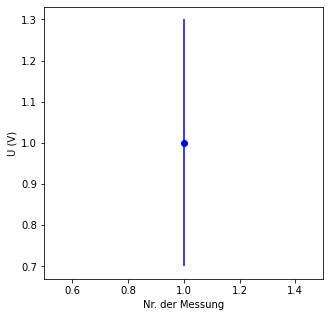

In [3]:
# diesen Code durch Eingabe von <shift><ret> ausführen

x = [1.0]  # Datenwerte für x-Achse, hier Nr der Messung
y = [1.0]  # Messwert (Datenpunkt)
delta_y = [0.3] # Messabweichung

# Diagrammdarstellung:
plt.figure(1, figsize=(5.,5.))
plt.errorbar(x, y, yerr=delta_y, fmt='bo')
plt.xlim(0.5, 1.5)
#plt.ylim(0.,1.1*(max(y)+max(delta_y)))
plt.ylabel("U (V)")
plt.xlabel("Nr. der Messung")
plt.show()

### Bedeutung von Messunsicherheiten <a id="SubSec-Bedeutung_von_Messunsicherheiten"></a>

Dass Messunsicherheiten bekannt sind und immer zu einem Messwert mitangegeben werden sollten, ist von sehr großer Wichtigkeit in der Messtechnik. Ähnlich wie die Einheit, ohne welche ein Zahlenwert keine Aussagekraft besitzt, gibt die Angabe der Messabweichung die Qualität der Messung an. Als Beispiel gucken wir uns zwei Messungen der Wellenlänge eines Lasers an. In beiden Fällen wurde der gleiche Wert ermittelt, aber es wurden unteschiedliche Unsicherheiten angegeben:

$$\displaystyle
\begin{array}{ll}
{\rm Messung\,1:\,} \lambda = & (1065 \pm 1.5) \rm{nm} \\
{\rm Messung\,2:\,} \lambda = & (1065 \pm 0.1) \rm{nm} \\
\end{array}$$

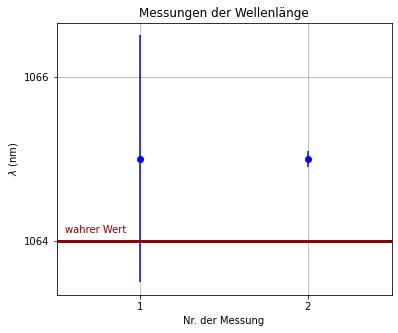

In [4]:
# diesen Code durch Eingabe von <shift><ret> ausführen

wl_m=[1065, 1065] # Messung der Wellenlänge in nm
delta_wl=[1.5, 0.1] # Unsicherheit der Wellenlängenmessung in nm
wl_r=1064 # wahrer / richtiger Wert der Wellenlänge des Lasers in nm

plt.figure(1, figsize=(6.,5.))
plt.errorbar([1, 2], wl_m, yerr=delta_wl, fmt='bo')

plt.axhline(wl_r, color='darkred', linewidth=3)
plt.text(0.55, 1064.1, 'wahrer Wert', color='darkred') 

plt.ylabel(r"$\lambda$ (nm)")
plt.xlabel("Nr. der Messung")
plt.title("Messungen der Wellenlänge")
# noch einige Verschönerungen:
plt.xlim(0.5, 2.5)
ax=plt.gca()
ax.locator_params(nbins=3)
plt.grid()

plt.show()

Nur einer der beiden Messwerte überlappt mit dem *richtigen* Wert der Wellenlänge des Lasers von 1064 nm. Der Fehlerbalken der zweiten Messung hingegen ist weit davon entfernt, in den *richtigen* Bereich überzulappen. D.h. es existiert hier ein Widerspruch zu vorherigen Messungen, die den wahren Wert kennzeichneten. Würde es sich hierbei nicht um die Messung der Wellenlänge, sondern um die einer Natur*konstante* handeln, gäbe es sogar einen Widerspruch zum SI-Einheitensystem. 

## Systematische Messabweichungen <a id="Sec-Systematische_Messabweichungen"></a>

Die Messabweichung, über die wir hier sprechen, ist die sogenannten **systematische** Messabweichung. Sie kann durch Aufwand und Kalibration verbessert werden, was *nicht* für zufällige Messabweichungen gilt. Systematische Messabweichungen (z.B. Kennlinienfehler) sollten in aller Regel am besten korrigiert werden, wenn dies möglich ist. Ansonsten sollte mindestens eine Angabe der Messabweichung erfolgen. Dies ist beispielsweise der Fall bei den Genauigkeitsangaben des Herstellers, mit denen man sich zwangsläufig zufrieden geben muss. 

### Messgeräteabweichung <a id="SubSec-Messgeräteabweichung"></a>

Messgeräte werden anhand ihrer Genauigkeit in Klassen eingruppiert. Die Klasse entspricht der relativen Messabweichung. Präzisionsmessgeräte besitzen somit Abweichungen die zwischen 0,001% und 0,05% liegen.

In [5]:
Image("pictures/hersteller_abweichung.png", width=800)

FileNotFoundError: No such file or directory: 'pictures/hersteller_abweichung.png'

FileNotFoundError: No such file or directory: 'pictures/hersteller_abweichung.png'

<IPython.core.display.Image object>

**Beispiel:**
Das Messgerät zeigt wie im Bild den Wert 5.847V an. Laut Hersteller ist die Maximalabweichung (unter Referenzbedingungen) $\pm$ (0,5% vom Messwert + 9 Digit). Die Anzahl der Nachkommastellen (also der Digits) ist in diesem Falle 3, also 0,001V. Genauer kann das Messgerät keine Spannung angeben. Die Messabweichung setzt sich also wiefolgt zusammen (zwei signifikante Stellen reichen hierbei, da der Messwert selber nicht genauer angezeigt wird):

$$\pm (0,5\% \cdot 5,847\,\mathrm{V} + 9 \cdot 0,001\,\mathrm V) \approx \pm 0,038\,\mathrm V = \pm 38,235\,\mathrm{mV}$$

In [6]:
Messwert = 5.847 # in V
Nachkommastellen = 5
A_rel = 0.005 # = 0.5%
Digit = 0.001 # in V 
A_total = A_rel * Messwert + 9 * Digit
print('+-',round(A_total,Nachkommastellen), 'V = +-', round(A_total*1000,Nachkommastellen), 'mV')

+- 0.03824 V = +- 38.235 mV


Allgemein geht man so vor, dass man versucht das Messgerät im Messaufbau so zu verwenden, wie es der Hersteller im normalen Betrieb vorgesehen hat. Das heißt es sind keine aufwändigen Vorarbeiten nötig und man erhält schnell ein Ergebnis, welches eine Genauigkeit entsprechend der Herstellerangaben aufweist. Um dieses Ergebnis zu verbessern, also um eine Reduzierung der Messabweichung des Geräts zu reduzieren, kann das Messgerät vorab kalibriert werden. Ein aussagekräftiges Ergebnis mit verbesserter Genauigkeit erhält man allerdings erst dann, wenn die externen Einflüsse reproduzierbar sind. Das bedeutet nicht, dass diese physikalischen Gesetzmäßigkeiten dem Verwender bekannt sein müssen, sie dürfen sich lediglich nicht ändern. 

## Statistische Messabweichungen <a id="Sec-Statistische_Messabweichungen"></a>

Statistische, oder zufällige, Einflüsse auf einen Messwert lassen sich durch Wiederholungen der eigentlichen Messung bestimmen. Dies nennt man auch Messreihe und bedeutet, dass $m$ Messungen für ein und denselben Messwert durchgeführt werden. Die einzelnen Messwerte $x_j$ unterscheiden sich, da der *richtige* Wert, $x_R$, immer mit einer zufälligen Abweichung, $A_j$,  versehen wird:

$$x_j = x_R + A_j$$

Prinzipiell sollte gelten, dass der gesuchte Messwerte, nennen wir ihn z.B. $\bar x$, möglichst wenig von den Einzelmessungen abweicht, d.h. wir gucken uns den Unterschied an: $(x_j - \bar x)$. Damit wir alle Messwerte hinzunehmen, fügen wir eine Summe hinzu und quadrieren die Klammer, damit sich Abweichungen nicht gegenseitig kompensieren könnten:

$$Q = \sum_{j=1}^m (x_j - \bar x)^2 = \textrm{minimal?}$$

Für unseren Messwert $\bar x$ soll die Gleichung minimal werden. Um den richtigen Messwert zu finden, leiten wir die Gleichung nach $\bar x$ ab und setzen sie gleich Null, um das Minimum zu berechnen:

$$\frac{dQ}{d\bar x} = -1 \cdot 2 \cdot \sum_{j=1}^m (x_j - \bar x) = 0$$

Die Gleichung wird nach dem gesuchten Messwert $\bar x$ umgestellt und wir erhalten den **empirischen Mittelwert**, der das **arithmetische Mittel** aus $m$ Beobachtungen ist:

$$\overline x = \frac{1}{m}\sum_{j=1}^m x_j$$

Für den Erwartungswert findet man in der Literatur unterschiedliche Bezeichnungen, unter anderem zum Beispiel $\overline x = E(x) = \left< x \right> = \mu$.

Der *Erwartungswert der quadratischen Abweichung der Einzelmessungen vom Mittelwert*, die **Varianz** $s^2$, 
lässt sich allgemein wie folgt schreiben und dient als Maß für die Streuung der Einzelmessungen um den Mittelwert:

$$s^2  =  \frac{1}{m} \sum_{j=1}^m \left( x_j - \overline x \right)^2$$

Unabhängig von der zugrundeliegenden Verteilung der Messwerte, die wir gleich noch kennen lernen werden, kann nun schon ein Maß für die Abweichung definiert werden, welche als **empirische Standardabweichung der Einzelmessungen** bekannt ist und sich aus der Quadratwurzel der Varianz berechnen lässt:

$$s = \sqrt{\frac{1}{m} \sum_{j=1}^m (x_j - \overline x)^2}$$

Man nehme beispielhaft die Messung einer Spannung. Die Messreihe ist im nachstehenden Bode-Block gegeben. Es wurden 15 wiederholte Messungen durchgeführt in denen 15x der Wert 1V gemessen werden sollte. Mittelwert, Standardabweichung der Einzelmessungen und Unsicherheit des Mittelwertes werden berechnet. 

In [7]:
# diesen Code durch Eingabe von <shift><ret> ausführen
x_volt=[1.02, 1.04, 0.98, 1.00, 0.95, 0.99,0.97,0.99,1.00,0.98,0.99,1.01,0.97,1.00,1.02] # Messergebnisse in Volt
n = len(x_volt)
data=np.array(x_volt)
mean=data.mean()
std=data.std(ddof=1)

print("Mittelwert der Messreihe: ", round(mean,5), 'V')
print("Standardabweichung der Messungen: ", round(std,5), 'V')

Mittelwert der Messreihe:  0.994 V
Standardabweichung der Messungen:  0.02293 V


Die grafische Darstellung einer solchen Messreihe erfolgt in einem **Histogramm**. Diese Darstellung wird insbesondere dann häufig benutzt, wenn Messreihen mit vielen Messwerten vorliegen. An einer solchen Darstellung erkennt häufig schon die Art der zugrundeliegenden Verteilung der Messwerten. In nachfolgendem Code-Block wird für die Messreihe die **absolute Häufigkeit** der einzelnen Werte in einer bestimmten Klasse grafisch dargestellt.

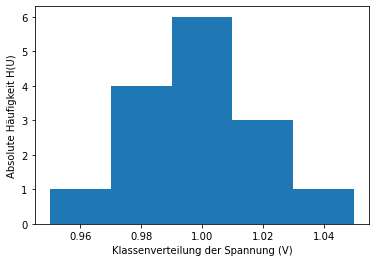

In [8]:
# diesen Code durch Eingabe von <shift><ret> ausführen

x_volt = np.array([1.02, 1.04, 0.98, 1.00, 0.95, 0.99,0.97,0.99,1.00,0.98,0.99,1.01,0.97,1.00,1.02], dtype=float)

bconts, bedges, _p = plt.hist(x_volt, bins=np.linspace(0.95, 1.05, 6))
plt.ylabel('Absolute Häufigkeit H(U)')
plt.xlabel('Klassenverteilung der Spannung (V)')
plt.show()

In der Klasse, welche Messwerte zwischen >=0,95V und <0,97V beinhaltet, wurde lediglich ein Messwert  aus der Datenreihe einsortiert (0,95V). Die Messwerte 0,97V wurden in die nächste höhere Klasse (>=0,97V und <0,99V) eingruppiert, hier befinden sich insgesamt 4 Messwerte. 

Die **relative Häufigkeit** berechnet sich aus der absoluten Häufigkeit dividiert durch die Gesamtanzahl der vorgenommenen Messungen.

Aus der Häufigkeit lässt sich auch die sogenannte **Häufigkeitsdichte** berechnen. 
Die Häufigkeitsdichte gibt bei einem Histogramm die Höhe des Rechtecks an. Mit ihr kann man den Vergleich verschiedener Klassen erst vornehmen. Anders ausgedrückt heißt dass, dass die Häufigkeitsdichte einer Klasse das Verhältnis der absoluten oder der relativen Häufigkeit einer Klasse zur entsprechenden Klassenbreite ist. Genauso lässt sich die Häufigkeitsdichte auch berechnen:

$$ h(x) = \frac{\textrm{relative oder absolute Häufigkeit}}{\textrm{obere Grenze der Klasse i} - \textrm{untere Grenze der Klasse i}} $$

Das Integral über die relative Häufigkeitsdichte ist immer auf 1 normiert, bzw auf 100% im Falle der absoluten Häufigkeitsdichte.

Im nachstehenden Code-Block wird die relative Häufigkeitsdichte für die obenstehende Messreihe geplottet und das Integral berechnet. 

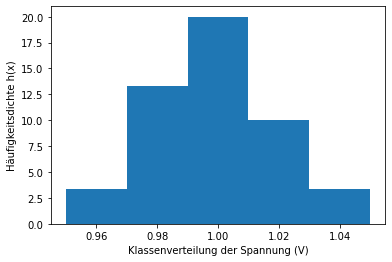

Integral über die Häufigkeitsdichte:  1.0


In [9]:
# diesen Code durch Eingabe von <shift><ret> ausführen

x_volt = np.array([1.02, 1.04, 0.98, 1.00, 0.95, 0.99,0.97,0.99,1.00,0.98,0.99,1.01,0.97,1.00,1.02], dtype=float)
m = len(x_volt)

bconts, bedges, _p = plt.hist(x_volt, density=True, bins=np.linspace(0.95, 1.05, 6))
plt.ylabel('Häufigkeitsdichte h(x)')
plt.xlabel('Klassenverteilung der Spannung (V)')
plt.show()

print('Integral über die Häufigkeitsdichte: ',(bconts * np.diff(bedges)).sum())

### Normalverteilung und Gaußverteilung <a id="SubSec-Normalverteilung_Gaußverteilung"></a>

Im letzten Abschnitt wurden die Kenngrößen der statistischen Messabweichung eingeführt und beispielhaft eine **Stichprobe** mit 15 Messdaten dargestellt. Je größer die Stichprobe, d.h. je größer $m$, desto eher erkennt man die zugrundeliegende Verteilung, die der Messreihe unterliegt. Häufig handelt es sich in der Praxis um eine Normalverteilung (oder auch Gaußverteilung genannt). Dies ist verblüffender Weise auch immer noch dann der Fall, wenn sehr viele externe Störungen (evtl. mit unterschiedlichen Verteilungsfunktionen) zu einer gemeinsamen Störgröße kombiniert werden. Die zusammengefasste Störung ist trotzdem fast immer gaußverteilt, egal die Einzelverteilungen aussehen (Poisson oder anderes). Dies wird auch als der **zentrale Grenzwertsatz der Wahrscheinlichkeitstheorie** bezeichnet.
> **Zentraler Grenzwertsatz der Wahrscheinlichkeitstheorie**: Der Durchschnitt einer großen Anzahl von Zufallsvariablen aus derselben Verteilung sind annäherend normalverteilt, unabhängig von der Verteilungsfunktion aus der sie herausgenommen wurden. 

Das heißt, dass auch die Mittelwerte (sollte man mehrere Stichproben aufnehmen) normalverteilt sind. Das heißt aus den verschiedenen Mittelwerten von $k$ Stichproben könnte theoretisch wieder ein Mitelwert berechnet werden. Außerdem kann analog die Standardabweichung der Mittelwerte berechnet werden:

$$s(\overline x) = \frac{s}{\sqrt{m}} = u_{\overline x}  = \sqrt{\frac{1}{m(m-1)} \sum_{j=1}^m (x_j - \overline x)^2}$$

Der Grenzwertsatz sagt aus, wenn man eine ausreichend große Stichprobe aus einer *Grundgesamtheit* nimmt, so wird der **Mittelwert der Stichprobe** näherungsweise dem **Mittelwert der Grundgesamtheit** entsprechen und sich somit dem *richtigen* Wert annähern.  Die **Unsicherheit des Mittelwertes** einer Messreihe ist gegenüber der Abweichung der Einzelmessungen um den Faktor $\sqrt{m}$ reduziert. Der Grund dafür ist, dass sich statistisch ermittelte Unsicherheiten teilweise herausmitteln. 

In folgenden Bildern ist ein Histogramm einer endlichen Messreihe (links) und die Kurve einer Gaußkurve geplottet (rechts). 

In [10]:
Image("pictures/endliche_gauß.png", width=800)

FileNotFoundError: No such file or directory: 'pictures/endliche_gauß.png'

FileNotFoundError: No such file or directory: 'pictures/endliche_gauß.png'

<IPython.core.display.Image object>

In folgender Tabelle sollen noch einmal die wichtigsten Kenngrößen für eine endliche Messreihe und die Graußverteilung gegenüber gestellt werden:

| | Endliche Messreihe | Gaußverteilung | |
| --- | --- | --- | --- |
| Stichprobenmittelwert: | $$\overline x = \frac{1}{m}\sum_{j=1}^m x_j$$ | $$\mu = \lim_{m \rightarrow \infty }\frac{1}{m}\sum_{j=1}^mx_j$$ | :Erwartungswert |
| Empirische Varianz: | $$s^2 = \frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2$$ | $$\sigma^2 = \lim_{m\rightarrow \infty}\frac{1}{m} \sum_{j=1}^m (x_j - \mu)^2$$ | :Varianz |
| Empirische Standardabweichung: | $$s = \sqrt{\frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2}$$ | $$\sigma = \lim_{m\rightarrow \infty}\sqrt{\frac{1}{m} \sum_{j=1}^m (x_j - \mu)^2}$$ | :Standardabweichung  |
| Standardabweichung der Mittelwerte: | $$ s(\overline x) = \frac{s}{\sqrt{m}} = u_{\overline x} $$ | | 

In der Tabelle sieht man noch einmal, dass die mittlere quadratische Abweichung für Varianz und Standardabweichung für eine endliche Messreihe durch $m-1$ anstelle von $m$ dividiert wird. Dies ist die *Bessel-Korrektur*, die dafür sorgt, dass die Schätzung aus den Messdaten unverzerrt ist. Mit unverzerrt meint man, dass der Erwartungswert des geschätzten Werts möglich dem *richtigen* Wert entspricht. Für kleine Stichproben, also kleine Werte von $m$, folgt daraus, dass die Abweichung größer wird. Als Konsequenz werden außerdem immer mindestens zwei Datenpunkte benötigt.

Für beide Fälle gilt jeweils, dass das Integral über die Dichtefunktion normiert ist. Entsprechend kann die **Wahrscheinlichkeit** dafür, dass ein bestimmtes Messergebnis gemessen wird, berechnet werden, in dem das Integral über einen Teilabschnitt der Verteilung berechnet wird. 

Bei einer echten Normalverteilung gilt folgendes:
* 69,8% aller Messwerte liegen im Bereich $\pm \sigma$
* 95,5% aller Messwerte liegen im Bereich $\pm 2\sigma$
* 99,7% aller Messwerte liegen im Bereich $\pm 3\sigma$
* Im Abstand $\pm \sigma$ sind die Wendestellen
* Die Normalverteilung reicht von $-\infty$ bis $+\infty$ 

Als Messtechniker gehen wir immer daher davon aus, dass innerhalb $\pm 3\sigma$ alle Messwerte liegen. Auf dieser Basis wird entsprechend auch die Messabweichung berechnet, also A = $\pm 3\sigma$.

Das **Endergebnis** der oben dargestellten Messreihe von $m = 15$ Messwerten wird in der Regel wiefolgt angegeben. Als Messwert wird nicht das Ergebnis einer Einzelmessung angegeben, sondern stets der Mittelwert der Messreihe inkl. seiner Unsicherheit:
$$ s(\overline x) = \frac{s}{\sqrt{m}} = u_{\overline x} $$

Der Mittelwert ist der beste Schätzwert, den wir für den *richtigen* Wert ermitteln können. Die Angabe des Messergebnisses erfolgt also wiefolgt:

$$x = \overline x \pm t \cdot u_{\overline x}$$

wobei $t$ den Vertrauensbereich angibt. Für $t=1$ wählen wir also die $\pm 1\sigma$-Umgebung, in der 69,8% der Messwerte liegen. Für $t = 2$, also die $\pm 2\sigma$-Umgebung, werden schon 95% aller Messwerte in diesem Bereich erwartet. Die Messabweichung ist dadurch erhöht, das Vertrauen allerdings auch.

In [11]:
# diesen Code durch Eingabe von <shift><ret> ausführen

x_volt=[1.02, 1.04, 0.98, 1.00, 0.95, 0.99,0.97,0.99,1.00,0.98,0.99,1.01,0.97,1.00,1.02] # Messergebnisse in Volt
m = len(x_volt)
data=np.array(x_volt)
mean=data.mean()
std=data.std(ddof=1)

print("Mittelwert der Messreihe: ", round(mean,3), 'V')
print("Standardabweichung der Messungen: ", round(std,3), 'V')
print("Abweichung des Mittelwertes: ", round(std/np.sqrt(m),3), 'V')
print('----------------------------------------------------------------')
print("Messergebnis (95%): (", round(mean,3), '+-',round(2*std/np.sqrt(m),3),') V')

Mittelwert der Messreihe:  0.994 V
Standardabweichung der Messungen:  0.023 V
Abweichung des Mittelwertes:  0.006 V
----------------------------------------------------------------
Messergebnis (95%): ( 0.994 +- 0.012 ) V


Die Angabe des Messergebnisses erfolgt in diesem Fall auf eine **signifikante Stelle** genau (signifikanten Stellen = angegebene Ziffern ohne Nullen, also hier 0,02V). Für die $2\sigma$-Umgebung ergibt sich folgender Messwert mit Unsicherheit:

$$U = (0,99 \pm 0,01)\,\mathrm V$$

Die Angabe mit zwei signifikanten Stellen wäre:

$$U = (0,994 \pm 0,012)\,\mathrm V \quad (95\%)$$ 

Die Nachkommastellen des Messergebnisses wird immer auf so viel Nachkommastellen gerundert, wie der Wert der Messabweichung. 

### Normierte Gaußverteilung <a id="SubSec-Normierte_Gaußverteilung "></a>

Jede Normalverteilung kann in eine normierte Gaußverteilung transformiert werden. Der Übergang erfolgt mit einer Transformation, die die Messwerte normiert. Dadurch können die Verteilungen verschiedener Messwerte miteinander verglichen werden, unabhängig von deren physikalischen Einheit. 

In [12]:
Image("pictures/normierte_gauss.png", width=900)

FileNotFoundError: No such file or directory: 'pictures/normierte_gauss.png'

FileNotFoundError: No such file or directory: 'pictures/normierte_gauss.png'

<IPython.core.display.Image object>


Die Differenz $x-\mu$ wird auf die Standardabweichung $\sigma$ normiert. Dadurch erhält man folgende Funktion für $\mu = 0$ und $\sigma = 1$ und $-1$:

$$h(z) = \frac{1}{\sqrt{2\pi}}\mathrm e^{-\frac{z^2}{2 ^2}} $$

Der Flächeninhalt unterhalb dieser Verteilungsfunktion ist wieder auf 100% normiert, wenn von $\pm \infty$ integriert wird. Die Maximale Amplitude ist jetzt $1/\sqrt{2 \pi}$. Die $z$-Achse (vorher Messwerte $x$) ist jetzt dimensionslos (einheitenlos). Somit können mit normierten Gaußverteilungen verschiedene physikalische Größen auch von verschiedenen Messgeräten bezüglich ihrer Streuung verglichen werden. Durch die Intervallgrenzen dieser Verteilung werden Güteklassen von Messeinrichtungen definiert. Andersherum können auch Anforderungen an Messgeräte gestellt werden: Die Anforderungen werden umso höher, je höher die Wahrscheinlichkeit sein soll, dass sich die Messwerte dem *richtigen* Wert annähern. 
Der Messtechniker kann somit mit der gegebenen Wahrscheinlichkeit abschätzen, ob ermittelte Messwerte innerhalb einer durch Fertigungsunterlagen zugelassenen Toleranz für die Maße eines Werkstücks liegen. Übliche Werte für Invervallgrenzen (meist symmetrisch, also Abweichungen sowohl nach unten als auch nach oben im gleichen Maße) und die zugehörigen Wahrscheinlichkeiten sind der nachfolgenden Tabelle angegeben: 

In [13]:
Image("pictures/tab_norm_grenzen.png", width=700)

FileNotFoundError: No such file or directory: 'pictures/tab_norm_grenzen.png'

FileNotFoundError: No such file or directory: 'pictures/tab_norm_grenzen.png'

<IPython.core.display.Image object>

#### Beispiel: Wahrscheinlichkeit für Zutreffen eines Ereignisses mittels Gauß-Test <a id="SubSubSec-Beispiel_Normierte_Gaußverteilung "></a>

Als wichtigste Erkenntnis gilt es festzuhalten, dass zu jeder Aussage zu zufälligen Abweichungen die zugehörige Wahrscheinlichkeit für das Zutreffen dieser Aussage zwingend erforderlich ist. Dies sollte immer mit angegeben werden, wenn DIE Messabweichung angegeben wird. 
Messwertangaben ohne Aussage zur Wahrscheinlichkeit bezüglich der zufälligen Abweichungen sind in der betrieblichen Praxis nicht brauchbar!

Es soll im Folgenden ein Messsystem einer Abfüllanlage überprüft werden, die Flaschen sind jeweils mit 0,7 l Saftgetränk befüllt.
Aus Kalibrierungen ist bekannt, dass die Messwerte des Messsystems der Abfüllanlage normalverteilt mit einem Erwartungswert $\mu$ = 0,7 l und Standardabweichung $\sigma$ = 5 ml sind. 
Wie groß ist die Wahrscheinlichkeit, dass die Saftflaschen mit einen Inhalt zwischen 0,69 l und 0,71 l befüllt werden?

Lösung: 
* Obere und untere Grenze werden in den $z$-Wert umgerechnet:

> $z_o = \frac{x-\mu}{\sigma} = \frac{(0,69-0,7)\,\mathrm l}{0,005\,\mathrm l} = -2$

> $z_u = \frac{x-\mu}{\sigma} = \frac{(0,71-0,7)\,\mathrm l}{0,005\,\mathrm l} = 2$

* Aus der Tabelle werden die Werte für $z = 2,00$ abgelesen:

> $\phi(2) = 0.97725$ (Wahrscheinlichkeit dafür, dass der Messwert zwischen 0 l und 0,71 l liegt)

> $\phi(-2) = 1 - \phi(2) =  1-0,97725 = 0,02275$ (Wahrscheinlichkeit dafür, dass der Messwert NICHT zwischen 0 l und 0,69 l liegt)

* Berechnung der Wahrscheinlichkeit, dass die Saftflaschen mit einem Inhalt zwischen 0,69 l und 0,71 l befüllt werden:

> $\phi(2) - \phi(-2) = 0,97725-0,02275 = 0,9545$

Mit einer Wahrscheinlichkeit von 95,45 % werden die Flaschen in der Abfüllanlage mit einem Inhalt von 0,69 l – 0,71 l befüllt. Dies entspricht auch genau der Wahrscheinlichkeit der $2\sigma$-Umgebung (siehe vorheriges Kapitel), was für $z = \pm 2$ natürlich auch so sein sollte. 

In [14]:
Image("pictures/normalverteilung_tabelle.png", width=500)

FileNotFoundError: No such file or directory: 'pictures/normalverteilung_tabelle.png'

FileNotFoundError: No such file or directory: 'pictures/normalverteilung_tabelle.png'

<IPython.core.display.Image object>

### Student- /t-Verteilung <a id="SubSec-Student-t_Verteilung"></a>

Für das Durchführen von Testverfahren wurde die t-Verteilung / Student-Verteilung konstruiert. Sie ist also eine Terstverteilung. Sie wird verwendet beim Test auf die Mitte einer normalverteilten Zufallsvariablen, wenn die Stichprobe klein ist und die Varianz nicht bekannt. Dies wird auch t-Test genannt. 

Angenommen es liegen Beobachtungswerte von unabhängig identisch normalverteilten Zufallsvariablen vor, z.B. $X_1$, ... ,$X_m$. Auf der Basis von dieser Stichprobe von $m$ Messwerten soll getestet werden, ob diese Beobachtung mit der Annahme eines angegebenen Mittelwertes vereinbar wäre. 

Als Prüfgröße berechnet man die Differenz zwischen den Mittelwerten, dem der Stichprobe und dem angegebenen. Die Differenz wird anschließend standardisiert. 

Falls die Varianz $\sigma^2$ der Grundgesamtheit bekannt ist, ist das Vorgehen der Prüfung recht einfach. Die Prüfgröße ist dann standardnormalverteilt und kann mittels **Gauß-Test** mit dem passenden kritischem Wert verglichen werden. Ist die Varianz der Grundgesamtheit unbekannt, muss sie aus der Stichprobenrealisation mittels Schätzfunktion geschätzt werden. 

$$s = \sqrt{\frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2}$$

Die t-Verteilung erlaubt – insbesondere für kleine Stichprobenumfänge – die Berechnung der Verteilung der Differenz vom Mittelwert der Stichprobe zum wahren Mittelwert der Grundgesamtheit.
Die t-Werte hängen vom Signifikanzniveau sowie von der Stichprobengröße $m$ ab und bestimmen das Vertrauensintervall und damit die Aussagekraft der Schätzung des Mittelwertes. 
Die t-Verteilung wird mit wachsendem $m$ schmaler und ist ab $m \rightarrow 200$ vergleichbar mit den Ergebnissen des Waherscheinlichkeitsintegrals und geht für $m \rightarrow \infty$ in die Normalverteilung über.

Der **Vertrauensbereich** $v$ für einen Mittelwert $x$ zu einem geforderten Vertrauensniveau, also der geforderten statistischen Sicherheit, kann wiefolgt angegeben werden:

$$v = \pm \frac{t}{\sqrt{m}}\cdot s = u_v$$

Die Größe des Vertrauensbereiches, gekennzeichnet durch obere und untere Grenze, wird mit Hilfe der diskreten t-Verteilung berechnet. 
Auf Basis der tabelliert vorliegenden t-Verteilung ist in Abhängigkeit von einem gewählten Vertrauensniveau und der Anzahl der Messwerte $m$ der zu untersuchenden Messreihe das zutreffende $t$ zu finden. 
Die unten stehende Quantil-Tabelle zeigt die zugehörigen Werte von $t$ in Abhängigkeit von der Messwertanzahl und dem gewählten Vertrauensniveau, dass die geforderte statistische Sicherheit beschreibt. 
Der Vertrauensbereich beschreibt die Aufspreizung des Mittelwertes einer Messreihe zu einem Vertrauensband, das umso breiter ist, je weniger Messwerte zur Auswertung zur Verfügung stehen und je größer das geforderte Vertrauensniveau ist. 
Der Vertrauensbereich gilt als Qualitätsmaß für die Genauigkeit einer durchgeführten Messung. 

Desweiteren können Vertrauensbereiche unterschiedlicher Wahrscheinlichkeiten ineinander umgerechnet werden:

$$\frac{u_{\alpha 1}}{t_{m-1; 1-\frac{\alpha_1}{2}}} =  \frac{u_{\alpha 2}}{t_{m-1; 1-\frac{\alpha_2}{2}}}$$

Hierbei ist $\alpha$ das Signifikanzniveau, also die Irrtumswahrscheinlichkeit $\alpha = 1-P$, wobei $P$ die Wahrscheinlichkeit bzw. die geforderte statistische Sicherheit ist.

In [15]:
Image("pictures/student-t.png", width=700)

FileNotFoundError: No such file or directory: 'pictures/student-t.png'

FileNotFoundError: No such file or directory: 'pictures/student-t.png'

<IPython.core.display.Image object>

Die Interpretation der Quantil-Tabelle der Student-t Verteilung kann verwirrend sein. Statt der Anzahl der Messwerte $m$ wird die Anzahl der Freiheitsgrade $s = m-1$ angegeben. Und statt des zweiseiten Vertrauensbereich $P = 1-\alpha$ wird der halbseitige Vertrauensbereich $p = 1-\alpha/2$ gewählt. Beide *Quantile* können aber über die eben angegebenen Formel einfach bestimmt werden.

### Beispiel: Student-t Verteilung <a id="SubSec-Beispiel_Student-t_Verteilung"></a>

Für die Spannung-Messreihe aus dem oben aufgeführten Beispiel waren folgende Parameter gegeben:
* Anzahl der Messwerte $m=15$
* Mittelwert: $\overline U = 0.994\,\mathrm{V}$
* Standardabweichung des Mittelwertes: $ u_{\overline U} = 0,006\,\mathrm V $

Oben hatten wir das Ergebnis, in dem 95% der Messwerte zu finden sind, wiefolgt angegeben gehabt, in dem wir die Gaußverteilung und den zugehörigen $2\sigma$-Vertrauensbereich benutzt haben:

$$U = (0,994 \pm 2\cdot 0,006)\,\mathrm V = (0,994 \pm 0,012)\,\mathrm V \quad (95\%)$$

In Anbetracht der sehr kleinen Stichprobe von lediglich $m=15$ Messwerten sollte jedoch die Student-t Verteilung hinzugezogen werden und der Vertrauensbereich für 95% korrigiert werden. Es gilt also:
> $P = 1-\alpha = 0,95$. Daraus folgt:

> $\Rightarrow \alpha = 1-P = 1-0,95 = 0,05$

> $\Rightarrow \alpha/2 = 0,025$

> $\Rightarrow p = 1-\alpha/2 = 1-0,025 = 0,975$

Für die Berechnung des s-Quantils gilt:

> $s = m-1 = 15-1 = 14$

Der $t$-Wert des korrigierten Vertrauebnsbereichs wird aus der Tabelle abgelesen:

$$t_{s;p} = t_{m-1; 1-\alpha/2} = t_{14; 0,975} = 2,145$$

Der Unterschied zum Vertrauensbereich, der aus der Normalverteilung hervorgeht, ist ein über 7% höherer Fehler.

In [16]:
print((2.145-2)/2*100,'%')

7.250000000000001 %


Die korrigierte Angabe des Messergebnisses lautet somit:

$$U = (0,994 \pm 2,145\cdot 0,006)\,\mathrm V = (0,994 \pm 0,013)\,\mathrm V \quad (95\%)$$

Die Umrechnung dieses Vertrauensbereich in einen Vertrauensbereich mit einem anderen Vertrauenzniveau, z.B. von 95% zu 99%, wird im folgenden anhand dieses Beispiels verdeutlicht. Die Ergebnisse für 95% sind bekannt. Nun muss das Quantil für 99% (also $\alpha = $1%) bestimmt werden. Analog werden die $s = m-1 = 14$ und $p = 1-\alpha/2 = 1-0,005 = 0,995$ Quantile bestimmt und der $t-Wert$ aus der Tabelle abgelesen: 

$$t_{s;p} = t_{m-1; 1-\alpha/2} = t_{14; 0,995} = 2,977$$

Hieraus kann nun nach obiger Gleichung der Vertrauensbereich für 99% berechnet werden:

> $\frac{u_{\alpha 1}}{t_{m-1; 1-\frac{\alpha_1}{2}}} =  \frac{u_{\alpha 2}}{t_{m-1; 1-\frac{\alpha_2}{2}}}$

> $\Rightarrow u_{\alpha 2} = u_{\alpha 1} \cdot \frac{t_{m-1; 1-\frac{\alpha_2}{2}}}{t_{m-1; 1-\frac{\alpha_1}{2}}} = 0,013\,\mathrm V \cdot 2,977 / 2,145 = 0,018\,\mathrm V$

Die Angabe des Messergebnisses lautet somit:

$$U = (0,994 \pm 0,018)\,\mathrm V \quad (99\%)$$

In [17]:
print(0.013*2.977/2.145)

0.018042424242424242


### Zusammenfassung zufälliger Unsicherheiten <a id="SubSec-Zusammenfassung_zufälliger_Unsicherheiten"></a>

In [18]:
Image("pictures/zusammenfassung_zufaellig.png", width=900)

FileNotFoundError: No such file or directory: 'pictures/zusammenfassung_zufaellig.png'

FileNotFoundError: No such file or directory: 'pictures/zusammenfassung_zufaellig.png'

<IPython.core.display.Image object>

## Fehlerfortpflanzung <a id="Sec-Fehlerfortpflanzung "></a>

In der Messtechnik gibt es zwei Möglichkeiten eines Messprinzips:
* Das **direkte Messverfahren**: der gesuchte Messwert wird unmittelbar durch den Vergleich mit einem Bezugswert derselben Messgröße gewonnen. Als Beispiel eignet sich hier die Balkenwaage, die die unbekannte Masse $m$ mit der bekannten Masse eines Gewichtssteins vergleicht.
* Das **indirekt Messerverfahren**: Die meisten physikalischen Größen werden so ermittelt, da sie nur indirekt ermittelt werden können. Die gesuchte Messgröße wird hierbei über physikalische Zusammenhänge auf andere Größen zurückgeführt und anschließend aus diesen ermittelt. Die Federwaage ist ein Beispiel hierfür, bei der eine unbekannte Masse $m$ über die Auslenkung $x$ einer Feder (Federkonstante $k$) ermittelt werden soll. Gravitationskraft wird der Rückstellkraft der Feder gleichgesetzt und man erhält folgenden Zusammenhang, wobei $g$ die Schwerebeschleunigung ist. 
$$mg = kx \Rightarrow m = \frac{kx}{g}$$

Durch dieses Beispiel wird klar, dass Messgrößen $y$ oft nicht direkt ermittelt werden, sondern über funktionelle Zusammenhänge von $n$ Messgrößen $x_i$ bestimmt werden:

$$ y = f(x_1, x_2, ...,x_n)$$

Aufgabe ist es nun das gesucht Messergebnisse $y$ aus den Messwerten $x_i$ zu bestimmen und das Ergebnis am Ende mit einer aussagekräftigen Messabweichung zu versehen, wenn jeder der Messgrößen eine Abweichung beinhaltet, $u_i$.

Allgemein gilt, dass sich jeder Funktion in einer bestimmten Umgebung an einer Stelle durch eine Taylorreihe darstellen lässt, die genau an dieser entwickelt wird. Einzige Voraussetzung ist, dass der Zusammenhang zwischen einer jedern Eingangsgröße $x$ und Ergebnisgröße eine glatte Funktion $y(x)$ ist. Dies ist in der Messtechnik, oder klassischen Physik, eigentlich immer gegeben.

In [19]:
Image("pictures/direkt_indirekt.png", width=500)

FileNotFoundError: No such file or directory: 'pictures/direkt_indirekt.png'

FileNotFoundError: No such file or directory: 'pictures/direkt_indirekt.png'

<IPython.core.display.Image object>

### Einleitung <a id="SubSec-Einleitung"></a>

Wir starten mit einem kleinen Beispiel. Angenommen, wir möchen die Varianz $s_y^2$ einer Größe $y$ berechnen, die sich linear aus zwei Zufallsvariablen $x_1$ und $x_2$ zusammensetzt, $y = a\,x_1 + b\,x_2$, wobei $a$ und $b$ reelle Zahlen sind. Dann gilt nach bekannten Rechenvorschriften:

$$\displaystyle\begin{eqnarray}
    s_y^2 &=& \left< { \left(y - \left< y \right> \right)}^2 \right>
                 = \left< y^2 \right> - \left< y \right>^2 \\
             &=& \left< a^2 x_1^2 + b^2 x_2^2 + 2 a b x_1 x_2 \right> 
                 - a^2 \left< x_1 \right>^2 - b^2 \left< x_2 \right>^2 
                 - 2 a b  \left< x_1 \right> \left< x_2 \right> \\
             &=& a^2 \left( \left<x_1^2\right> - \left<x_1\right>^2 \right)
                 + b^2 \left( \left<x_2^2\right> - \left<x_2\right>^2 \right) 
                 + 2ab \,\bigl( \left<x_1 x_2\right> - \left<x_1\right> \left<x_2\right> \bigr)\\
             &=& a^2 s_1^2 + b^2 s_2^2 
                 + 2ab \,\bigl(\left< x_1 x_2 \right> - \left< x_1 \right>\left< x_2 \right>\bigr)\\
             &=& a^2 s_1^2 + b^2 s_2^2 
                 + 2ab\cdot \mathrm{cov}(x_1, x_2)
\end{eqnarray}$$

Der letzte Term verschwindet für *unabhängige* Zufallsvariable $x_1$ und $x_2$. 
Er enhält die sogenannte **Kovarianz**, 

$\mathrm{cov}(x_1, x_2) = \left< (x_1 - \left<x_1 \right>)(x_2  - \left<x_2\right>)\right>
               = \left< x_1 x_2 \right> - \left< x_1 \right>\left< x_2 \right>$

Die Kovarianz ist eine Verallgemeinerung der *normalen* Varianz $s^2$ für zwei Variablen: Es gilt $\rm{cov}(x,x) = s^2_x$, d. h. die *Kovarianz einer Variable mit sich selbst entspricht der Varianz*.

**Verwendete Rechenregeln:**

Für Erwartungswerte gelten allgemein einfache Rechenregeln, die aus der Linearität der Definition des Erwartungswerts folgen. Im folgenden sind $a$, $b$ Konstanten und $x$, $x_1$ und $x_2$ Zufallsgrößen. Es gilt: 

$\left< a \right> = a$, d. h. auch $\left< \left< x \right>\right> = \left< x \right>$

$\left< ax \right> = a \left<  x \right>$
 
$\left< x_1 + x_2 \right>  = \left<  x_1 \right>  + \left< x_2  \right>$

und damit auch $\left< a x_1 + b x_2  \right> = a \left< x_1  \right> + b \left< x_2 \right>$ 
 
Der Erwartungswert der quadratischen Abweichung vom Mittelwert, die Varianz $s^2_x$, 
lässt allgemein wie folgt schreiben:

$s^2_x = \left< { \left(x - \left< x\right> \right)}^2 \right>$ 

Durch Ausmultiplizieren erhält man die äquivalente Darstellung

$$\begin{array}{lcl} 
s^2_x  & = & \left< x^2 - 2 x \left< x \right>  +  \left< x \right>^2 \right> \\
  ~  & = & \left< x^2 \right> - \left<2x \left< x\right>\right> + \left<\left< x \right>^2\right> \\ 
   ~ & = & \left< x^2 \right> - 2 \left< x \right>^2 + \left< x \right>^2 \\
   ~ & = & \left< x^2 \right> - \left< x \right>^2 \\
\end{array}$$

Achtung: der Erwartungswert eines Produktes ist im Allgemeinen nicht gleich dem Produkt der Erwartungswerte,

> $\left< x_1 x_2 \right> \ne \left< x_1 \right> \left< x_2 \right>$.

Gleichheit ($\left< x_1 x_2 \right> = \left< x_1 \right> \left< x_2 \right>$) gilt nur dann, wenn $x_1$ und $x_2$ unabhängige Zufallszahlen sind. 

### Abweichung mit Vorzeichen (systematische Abweichung) bei unabhängige Variablen <a id="SubSec-abweichung_mit_vorzeichen"></a>

In diesem Kapitel wollen wir uns die erste Art von Fehlerfortpflanzung bei einer indirekten Messungen ansehen. Wir nehmen an, dass wir das Vorzeichen der Abweichung kennen. Dies ist nur bei systematischen Abweichungen der Fall, welche auf jeden Fall zur Korrektur des Messwertes heran gezogen werden sollen. 

Für eine allgemeine Funktion $f(x) = y(x)$ **einer** Zufallsgröße $x$ lässt sich die Frage
nach der Unsicherheit näherungsweise beantworten, wenn man
die Taylor-Entwicklung von $y$ an der Stelle $\bar x$ um deren Messabweichung $\Delta x$ herum entwickelt:

$$y = y(x)\quad \Rightarrow \quad y(x+\Delta x)= y(x) + \frac1{1!}\ \frac{dy(x)}{dx} \cdot \Delta x + \frac1{2!}\ \frac{d^2 y(x)}{d x^2}\cdot (\Delta x)^2 + \cdots$$

Da die Unsicherheit typischerweise eine kleine Größe ist, wird die Reihenentwicklung nach dem linearen Glied abgebrochen, da höhere Ordnung von $(\Delta x)^2$ recht klein werden. Damit ergibt sich die Näherung:

$$ y(x+\Delta x)= y(x) + \frac1{1!}\ \frac{dy(x)}{dx} \cdot \Delta x \quad \Rightarrow \quad y(x+\Delta x) - y(x) = \Delta y =  \frac{dy(x)}{dx} \cdot \Delta x$$

Diese Formel gilt, wenn das Messergebnis von einer einzelnen Zufallsgröße abhängt. Kommen weitere Messgrößen dazu, welche voneinander unabhängig sind, wird die entsprechende Reihenentwicklung verwendet, welche ebenfalls bis zum linearen Glied als Näherung für kleine $\Delta x$ angenommen werden kann:

$$y = y(x_1, x_2, ...)  \quad \Rightarrow \quad \Delta y = \frac{\partial y}{\partial x_1} \cdot \Delta x_1 + \frac{\partial y}{\partial x_2} \cdot \Delta x_2 + ...$$

wobei hier der Term $\frac{\partial y}{\partial x_1}$ die *partielle* Ableitung der Funktion $y(x_1, x_2, ...)$ nach der Größe $x_1$ bedeutet. Wird die partielle Ableitung nach $x_1$ berechnet, verhalten sich alle anderen Eingangsgrößen ($x_2, ...$) wie eine Konstante. 

Wichtige Spezialfälle sind Summen, Differenzen, Produkte oder Quotienten von zwei Größen. Beachte hier, dass wir in diesem Kapitel Fehler **mit Vorzeichen** betrachten, das heißt wir wissen, in welche Richtung der Messwert abweicht. 

* Setzt sich die gesuchte Größe $y$ aus der **Addition** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Addition der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 + x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 + \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Subtraktion der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 - x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 - \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Addition der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \cdot x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} + \frac{\Delta x_2}{x_2} }$$

* Setzt sich die gesuchte Größe $y$ aus der **Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Subtraktion der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 / x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} - \frac{\Delta x_2}{x_2} }$$
   
**Anmerkung:** Hierbei werden keiner Fehlergrenzen ($\pm$) angegeben, sondern systematische Messabweichungen mit bekanntem Vorzeichen. Bei Fehlergrenzen und statischen Unsicherheiten, gelten andere Sacherverhalte (siehe nächsten Abschnitt)! Die Formeln gelten *nur*, wenn das Vorzeichen des Fehlers bekannt ist. Bei dieser Fehlerfortpflanzung können sich also Abweichungen ergänzen oder sogar *aufheben*, wie das folgende Beispiel zeigt.

**Beispiel:** Eine Messgröße $x_1$ wird um 2% zu klein gemessen und Messgröße $x_2$ um 3% zu groß. 
> Bei der Multiplikation $y=x_1 \cdot x_2$ wird $y$ um 5% zu groß gemessen (2% + 3% = 5%).

> Bei der Division $y=x_1 / x_2$ wird $y$ um 1% zu klein gemessen (2% - 3% = -1%).

### Fehlergrenzen (Vorzeichen der Messabweichung unbekannt) bei unabhängigen Unsicherheiten <a id="SubSec-Fehlergrenzen"></a> 

Die Größe der Messabweichung eines Messgereätes ist zwar betragsmäßig bekannt, das Vorzeichen jedoch nicht. Dies war auch der Fall in unserem obigen Beispiel der *Messgeräteabweichung* von $\pm$5%. Somit sind nur die Grenzen dieser Abweichung bekannt. Die gesuchte Abweichung $\Delta y$ der Messgröße $y$ kann aber über denselben mathematischen Ansatz wie eben ermittelt werden, wobei wir annehmen, dass sich die Abweichungen im schlimmsten Fall bei ungünstigen Vorzeichenkombinationen zu einem **Maximalfehler** addieren:

$$\Delta y = \left| \frac{\partial y}{\partial x_1} \right| \cdot \Delta x_1+ \left|\frac{\partial y}{\partial x_2} \right| \cdot \Delta x_2 + \cdots$$

Die Spezialfälle vereinfachen sich aufgrund der Beträge zu folgenden Sachverhalten:

* Setzt sich die gesuchte Größe $y$ aus der **Addition oder Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Addition der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \pm x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 + \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation oder Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Addition der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \cdot x_2 \quad \textrm{oder} \quad y=x_1 / x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} + \frac{\Delta x_2}{x_2} }$$   

### Messunsicherheiten bei unabhängigen, zufälligen Variablen <a id="SubSec-Fehlerfortpflanzung_bei_unabhängigen_Unsicherheiten"></a> 

Nun gehen wir über von Fehlerfortpflanzungsgesetzen für systematische Abweichungen zu Gesetzmäßigkeiten, die für rein statistische Messgrößen $x$ gelten. Die Messgröße $x$ wird wie oben eingeführt über statstische Verfahren ermittelt und im Rahmen einer Messreihe (mit $m$ Messwerten) aufgenommen. Mittelwert und Unsicherheit werden also wiefolgt berechnet:

$$\overline x = \frac{1}{m}\sum_{j=1}^m x_j$$

$$s(\overline x) = \frac{s}{\sqrt{m}} = \sqrt{\frac{1}{m(m-1)} \sum_{j=1}^m (x_j - \overline x)^2} =  u_{\overline x}$$

Für große Stichproben wird die Unsicherheit des Mittelwertes immer kleiner und strebt gegen Null, und bei Abwesenheit systematischer Fehler nähert sich der Mittelwert somit dem *richtigen* Wert an. 

Bei der Fehlerfortpflanzung wird als Eingangsgröße häufig der Mittelwert benutzt, und seine entsprechend kleine Unsicherheit benutzt, um die Unsicherheit für die Ausgangsgröße $y$ zu bestimmen. Die Taylorreihe von $y(x)$ wird entsprechend an der Stelle des Mittelwertes $x = \bar x$ entwickelt und es folgt:

$$u_y = \left| \frac{dy}{dx} \right| \cdot u_\bar x$$

Da es sich bei statistische Unsicherheiten um Grenzen handelt, also das Vorzeichen der Abweichung nicht existiert, müssen wieder deren Beträge berücksichtigt werden. 

Haben wir nun den Fall, dass sich die gesuchte Größe $y$ aus mehreren voneinander unabhängigen Eingangsgrößen $\bar x_1, \bar x_2, ...$ und deren Unsicherheiten $u_1, u_2, ...$ zusammensetzt, gelten folgenden Regeln:

* Das Messergebnis $y$ berechnet sich aus den Mittelwerten $\bar x_1, \bar x_2, ...$
* Um die Unsicherheit $u_y$ zu bestimmen, wird wieder mit der linearen Näherung bei mehreren unabhängigen Variablen begonnen (partielle Ableitungen bilden!), allerdings müssen jetzt, wie bei der Berechnung der Standardunsicherheit, die *quadrierten* Beiträge der Einzelunsicherheiten addiert werden:

$$u_y = \sqrt{\left (\frac{\partial y}{\partial x_1} \cdot u_1 \right)^2 +\left (\frac{\partial y}{\partial x_2} \cdot u_2 \right)^2 +\cdots}$$

Dies nennt sich auch das **Gauß'sche Fehlerfortpflanzungsgesetz** und wird bei Unsicherheiten, aber nicht bei systematischen Messabweichungen / Fehlern verwendet. 

Für die Spezialfälle gilt nun:

* Setzt sich die gesuchte Größe $y$ aus der **Addition oder Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre quadrierte Unsicherheit aus der Addition der quadrierten Unsicherheiten der Einzelmessungen berechnet: 

$$y=\bar x_1 \pm \bar x_2 \Rightarrow  \color{blue}{
   u_y^2 =  u_1^2 + u_2^2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation oder Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative quadrierte Unsicherheit aus der Addition der relativen quadrierten Unsicherheiten der Einzelmessungen berechnet: 

$$y=\bar x_1 \cdot \bar x_2 \quad \textrm{oder} \quad y=\bar x_1 / \bar x_2 \Rightarrow  \color{blue}{
   \left(\frac{u_y}{y}\right)^2 =  \left(\frac{u_1}{\bar x_1}\right)^2 + \left(\frac{u_2}{\bar x_2} \right)^2}$$  
   
**Hinweis:** Diese Gesetze sind nur bei hinreichender Linearität anwendbar, d.h. wenn sich die Funktion $y(x_1, x_2, ...)$ bei Änderung einer der Eingsangsgrößen $x_i$ im Bereich ihrer eigenen Unsicherheit $u_i$ nur hinreichen linear verändert. Andernfalls wird die Fehlerfortpflanzung aufwendiger (DIN1319).

### Messunsicherheiten bei abhängigen (korrelierten), zufälligen Variablen <a id="SubSec-Fehlerfortpflanzung_bei_korrelierten_Unsicherheiten"></a> 

Häufig liegt in der Messtechnik der Fall vor, dass wir voneinander unabhängige Messungen betrachten und diese zu unserer gesuchten Messgröße kombinieren. Teilweise können aber auch Messungen beobachtet werden, welche eine Abhängigkeit voneinander aufweisen. In diesem Fall spricht man von **Korrelationen** zwischen Messgrößen und der Kovarianz-Term, der bereits oben einmal eingeführt wurde, muss berücksichtigt werden! 

* Bei **unabhängigen (nicht-korrelierten)** Messungen wurde der Kovarianz-Term oben bisher auf Null gesetzt: 

$$\mathrm{cov}(x_1, x_2) = 0$$

* Bei **abhängigen (korrelierten)** Messungen besitzen die Messungen *gemeinsame* Unsicherheiten, wenn z.B. alle Messungen eine gemeinsame systematische Unsicherheit besitzen: 

$$\mathrm{cov}(x_1, x_2) = \left< x_1 x_2 \right> - \left< x_1 \right>\left< x_2 \right>$$

Diese *gemeinsame* Unsicherheit resultiert darin, dass Abhängigkeiten zwischen den gemessenen Messwerten $x_1$ und $x_2$ entstehen. Ist zum Beispiel die eine Messgröße $x_1$ zu groß, so ist die Wahrscheinlichkeit, dass auch die andere Größe $x_2$ einen zu großen Wert hat, erhöht. Diesen Effekt, dass beide Größen zu große Werte ausgeben, nennt man auch **positive Korrelation**. Entsprechend würde eine **negative Korrelation** bedeuten, dass der zweite Wert einer Messgröße mit erhöhter Wahrscheinlichkeit zu klein ausgegeben wird, obwohl die erste Größe einen zu großen Wert hat. Ein Beipiel für eine negative Korrelation ist die Ausgleichsgerade $y = m\cdot x + b$, welche an Messwerte angepasst werden kann. Wenn sich der Wert von $m$ vergrößert, zu muss zwangsläufig der $y$-Achsenabschnitt $b$ kleiner werden, damit die Gleichung weiterhin erfüllt ist. Die Größen $m$ und $b$ sind also negativ korreliert. 
Sind hingegen zwei Variablen *unabhängig*, so kann man aus dem Wert der ersten *keine* Information über die zweite Variable gewinnen. In diesem Fall spricht ist die Korrelation exakt Null. 

Das **Gauß'sche Fehlerfortpflanzungsgesetz** muss für diesen Fall erweitert werden, indem die Kovarianzen oder die Korrelationskoeffizienten zwischen jeweils zwei Größen, für alle $N$ Messgrößen, berücksichtig werden. 
Setzt sich eine Messgröße $y$ aus $N$ fehlerbehafteten Größen $x_1 \pm u_1, x_2 \pm u_2, ...  x_N \pm u_N$ zusammen (die Mittelwertschreibweise $\bar x_i$ wurde hier wegen die Übersichtlichkeit weggelassen), so gilt für ihre Unsicherheit:

$$u_y=\sqrt{\underbrace{\sum_{i=1}^N\left(\frac{\partial y}{\partial x_i}\cdot u_i\right)^2}_{\mathrm{wie~oben}}+ 2\underbrace{\sum_{i=1}^{N-1}\sum_{k=i+1}^N\frac{\partial y}{\partial x_i}\ \frac{\partial y}{\partial x_k}\cdot \mathrm{cov}(x_i, x_k)}_{\mathrm{Korrelationsterme}}}$$

Für die Spezialfälle gilt nun:
* Addition und Subtration zweier korrelierter Messwerte führt zu folgendem Fehlerfortpflanzungsgesetz:

$$y=x_1 \pm x_2 \Rightarrow \color{blue}{
   {s_y}^2 = {s_1}^2 + {s_2}^2 \pm 2\, \mathrm{cov}(x_1,x_2) } $$
   
* Multiplikation oder Division zweier korrelierter Messwerte führt zu folgendem Fehlerfortpflanzungsgesetz:

$$y=x_1 \cdot  x_2 {\rm ~oder~} y = \frac{x_1}{x_2} \Rightarrow \color{blue} {
    \left( \frac{s_y} {y} \right)^2 \simeq 
    \left( \frac{s_1} {x_1} \right)^2  
  + \left( \frac{s_2} {x_2} \right)^2
   \pm 2\frac{\mathrm{cov}(x_1,x_2)}{x_1 x_2} }$$


* der spezielle Fall für $y = f(x_1, x_2, ... x_n)$ und **100% abhängige (100% korrelierte)** Variablen:

$$u_{y}= \displaystyle \sum_{i=1}^n
 \left| \frac{\partial y}{\partial x_i} \right| u_{i}$$


**Beispiel:** Man nehme zwei Messwerte $x_1$ und $x_2$ deren Erwartungswerte und Unsicherheiten jeweils identisch sind, z.B. $\bar x_1 = \bar x_2 = 10$ mit $u_1 = u_2 = 1$
  
Die zu ermittelnde Messgröße wird über folgende Relation berechnet:
$$y = \bar x_1 - \bar x_2$$

Das Ergebnis für $r = 0$, d.h. **unabhängige** Messwerte, der kombinierten Messunsicherheit für $y$ beträgt $u_y = 1.4$

Das Ergebnis für $r = 1$, d.h. **korrelierte** Messwerte, der kombinierten Messunsicherheit für $y$ beträgt $u_y = 0.0$

Dieses Beispiel findet häufig Anwendung im Bereich die Signalübertragung und ist unter der Bezeichnung **differentielle Signalübertragung** bekannt. Neben dem eigentlichen Signal, $x_1$ wird hierbei ein zweites, invertiertes Signal mitübertragen, $x_2 = -x_1$. Da alle Störungen innerhalb der gleichen Übertragungsstrecke fast vollständig korreliert sind, heben sich diese am Ende auf. Das Nutzsignal erhält man zurück, indem man folgende Signalkombination berechnet: $y = 0.5\cdot (x_1 - x_2)$. Aufgrund des hohen Korrelationsgrades der einzelnen Signalkomponenten ist die Unsicherheit des extrahierten Signal sehr klein: $u_y \simeq 0$.

### Kovarianz und Korrelation <a id="SubSec-Kovarianz_und_Korrelation"></a>

Folgende Begrifflichkeiten wollen wir hier noch mal zusammenfassen und erläutern: 

* Definition der **Kovarianz**:

$$\mathrm{cov}(x_1, x_2) = \frac{1}{N}\sum_{i=1}^N (x_{1,i}-\overline x_1)\cdot (x_{2,i}-\overline x_2) = \overline{x_1 x_2}- \bar{x_1} \bar{x_2}$$

* Die Kovarianz einer **einzelnen Variablen** entspricht ihrer Varianz:

$$\mathrm{cov}(x_1, x_1) = s^2_{x_1}$$

* Es kann folgender **Maximal-Wert** der Varianzen erreicht werden:

$$\sqrt{s^2_1 \cdot s^2_2} = s_1 \cdot s_2$$

* Für unabhängige Größen fallen die Korrelationsterme weg, da die Kovarianz Null wird und die Berechnung aus dem vorangegangenen Kapitel können benutzt werden.

$$\mathrm{cov}(x_1, x_2) = 0$$

* Die relative Unsicherheit einer Größe, die sich aus zwei korrelierten Größen zusammensetzt, kann kleiner sein als die Einzelunsicherheiten (keine Beträge in der Formel bei den *Korrelationstermen*)!

* Wenn es mehrere Variable gibt, werden paarweise Werte für die Kovarianz berechnet, dadurch erhält man die sogenannte **Kovarianzmatrix**:  

$${\bf S^2} = (s^2_{ij}) =  \left( \mathrm{cov}(x_i, x_j) \right).$$

* Im Prinzip kann die Kovarianz, und somit auch die Werte in der Kovarianzmatrix, jeden beliebigen Wert annehmen, was zu einem sehr großen Wertebereich führt. Um die Darstellung zu vereinfachen wird die Kovarianz typischerweise normiert, sodass die Kovarianz Werte zwischen $-1$ und $+1$ annimmt und sich der **Korrelationskoeffizient** ergibt:

$$\bigl( r_{ij} \bigr) \,=\, \Bigl (\frac{ \mathrm{S}^2_{ij} } {s_i\,s_j} \Bigr)$$

* Der Korrelationskoeffizient für nur zwei Variablen sieht in vereinfachter Schreibweise wiefolgt aus:

$$r = \frac{\mathrm{cov}_{x_1x_2}}{s_{x_1} \cdot s_{x_2}} = \frac{\sum_{i=1}^N (x_{1,i}-\overline x_1)\cdot (x_{2,i}-\overline x_2)}{\sqrt{\sum_{i=1}^N (x_{1,i}-\overline x_1)^2} \cdot \sqrt{ \sum_{i=1}^N (x_{2,i}-\overline x_2)^2}}$$

> Wir haben nun verschiedene Kenngrößen der Statistik kennengelernt, um Beziehungen zwischen zwei Variablen zu beschreiben. Die **Kovarianz** ist eher ungeeignet um Größen miteinander zu vergleichen, da sie von der Skalierung abhängt. Der **Korrelationskoeffizient** hingegen ist eine mormierte Größe und kann als Maß für Korrelationen benutzt werden. Allerdings nur für lineare Korrelationen! Außerdem muss auch hierbei Vorsicht gewahrt werden: Eine hoher Korrelationskoeffizient bedeutet nicht immer eine hohe Korrelation der Variablen. Es kann sich auch um Ausreißer handeln! Außerdem wird die Bedeutung der Korrelation auch häufig überinterpretiert. Ein kleiner Korrelationskoeffizient beudetet nämlich auch nicht notwendigerweise, dass es keinerlei Beziehung zwischen zwei Variablen gibts. Der Zusammenhang könnte ja ein anderer als linear sein, z.B. quadratisch. Dann würde die Korrelation trotz quadratischem Zusammenhang den Wert 0 ausgeben. 

Zum besseren Verständnis mag ein Beispiel helfen. Wir erzeugen dazu Zufallsgrößen mit
unabhängigen und gemeinsamen Fehlern.

#### Beispiel und grafische Darstellung von Kovarianz und Korrelation <a id="SubSubSec-covBeispiel"></a>

In diesem Abschnitt werden verschiedene Code-Blocks eingefügt, um ein Beispiel durchzurechnen und zu simulieren. Zunächst werden zwei Messungen $m_i$ generiert. Die beiden Messungen setzen sich jeweils aus dem *richtigen* Wert $r_i$, einem *unabhängigen* zufälligen Anteil $u_i$ und einem *gemeinsamen* zufälligen Anteil $u_g$. 

$$m_1 = r_1 + u_1 + u_g$$
$$m_2 = r_2 + u_2 + u_g$$ 

Zunächst erstellen wir drei Listen mit jeweils 250 standard-normalverteilten Zufallsgrößen. 

In [20]:
# Zufallszahlen erzeugen
u_1 = np.random.randn(250)
u_2 = np.random.randn(250)
u_g = np.random.randn(250)

Durch Multiplikation mit vorgegebenen Werten für die jeweiligen Unsicherheiten und Addition zu den angenommenen richtigen
Werten der Messgrößen mit *m1* und *m2* erhalten wir simulierte Messwerte:

In [21]:
# richtige Werte
r_1 = 5.0
r_2 = 5.0

# Unsicherheit
s_1 = 1.0
s_2 = 1.0
s_g = 0.0

# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g

Zur Veranschaulichung wählt man ein sogenanntes "Streudiagramm" (engl.: "scatter-plot"), 
wie es in *matplotlib.pyplot.scatter()* implementiert ist:

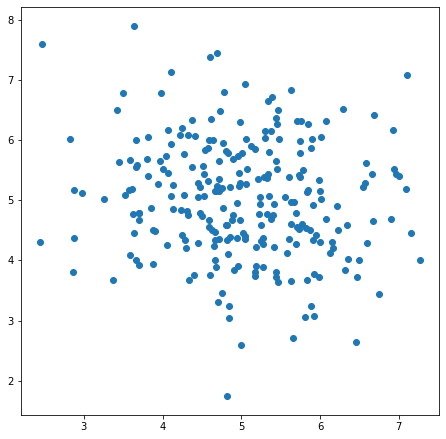

In [22]:
def scatterplot(x, y):
    plt.figure(figsize=(7.5,7.5))    
    plt.scatter(x, y)
    plt.show()
    
scatterplot(m_1, m_2)

Um eine Stärke für die Korrelation zu definieren wird der Korrelationskoeffizient berechnet. 
Die Elemente der Kovarianzmatrix sind:
> $s^2_{11} = s_1^2 + s_g^2$  
  $s^2_{22} = s_2^2 + s_g^2$  
  $s^2_{12} = s^2_{21} = s_g^2\,$;

Und der Korrelationskoeffizient $\rho$ der beiden Messungen ergibt sich somit zu:

$$\displaystyle r = \frac{s^2_{12}}{\sqrt{s^2_{11} \cdot s^2_{22}}}\,$$

In [23]:
rho = s_g*s_g / np.sqrt( (s_1**2 + s_g**2) * (s_2**2+s_g**2))
print ('Korrelationskoeffizient r = ', rho)

Korrelationskoeffizient r =  0.0


*Aufgabe: Im nachfolgenden Code-Block wurden die Code-Schnipsel des Beispiels zusammengefügt. Probier verschiedene Werte für die richtigen Werte $r_1$ und $r_2$ aus, sowie ändere ebenfalls $s_1$, $s_2$ und $s_g$ (z.B. 0., 0.5, 1.0, 1.5) und lass den Korrelationskoeffizienten berechnen. Welcher Zusammenhang zwischen Streudiagram und Korrelationskoeffizienten lässt sich erkennen?*

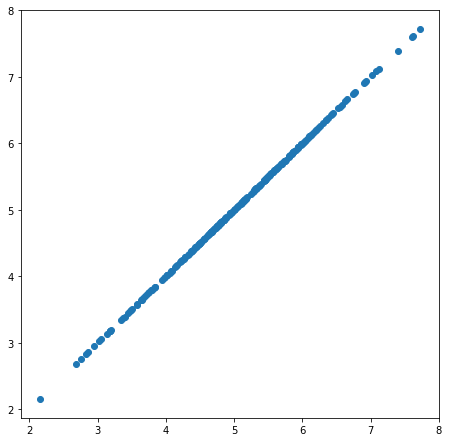

Korrelationskoeffizient r =  1.0


In [24]:
# richtige Werte
r_1 = 5.0
r_2 = 5.0

# Unsicherheit
s_1 = 0.0
s_2 = 0.0
s_g = 1.0

# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g

# Zufallszahlen erzeugen
u_1 = np.random.randn(250)
u_2 = np.random.randn(250)
u_g = np.random.randn(250)

def scatterplot(x, y):
    plt.figure(figsize=(7.5,7.5))    
    plt.scatter(x, y)
    plt.show()
    
scatterplot(m_1, m_2)

rho = s_g*s_g / np.sqrt( (s_1**2 + s_g**2) * (s_2**2+s_g**2))
print ('Korrelationskoeffizient r = ', rho)

## Zusammenfassung <a id="Sec-Zusammenfassung"></a>

In [25]:
Image("pictures/zusammenfassung_3.png", width=800)

FileNotFoundError: No such file or directory: 'pictures/zusammenfassung_3.png'

FileNotFoundError: No such file or directory: 'pictures/zusammenfassung_3.png'

<IPython.core.display.Image object>